In [1]:
import sys
sys.path.append('/home/dell/miniconda3/envs/VBOF/lib/python3.8/site-packages')
sys.path.append('/media/dell/0E54E2B554E29EA9/HanRunpeng/HIV-VBOF/')
from cobra import Model, Reaction, Metabolite
from viranet.info import metDict, ntpsDict, aaDict, miscDict, ntpsMets, aaMets, N_A, k_atp, k_ppi
from VBOFKit import generation
import cobra
import pickle
import gurobipy as grb
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
ViraNet, (c) 2016, The University of Warwick (the 'Software') 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


# Generate HIV-1 Production Reaction

In [2]:
virus_HIV = "/media/dell/0E54E2B554E29EA9/HanRunpeng/VBOF/HIV-1.gb"

In [15]:
# Load HIV virus file
with open(virus_HIV,'rU') as vf:
    virusFile_HIV     = vf.readlines()
for ii in range(len(virusFile_HIV)):
    virusFile_HIV[ii] = virusFile_HIV[ii].rstrip('\n')

/tmp/ipykernel_4111310/3420648509.py:2: DeprecationWarning: 'U' mode is deprecated
  with open(virus_HIV,'rU') as vf:


In [16]:
# Copy number of each structural protein
protein_copy_number_dict = {'gag':5000, 'gag-pol':100, 'vpr':1, 'tat':1, 'vpu':1,
                            'env':10, 'asp':1, 'rev':1, 'nef':1}
# Ref: DOI: 10.1126/sciadv.abn9874 gag-pol 100
# Ref: DOI: 10.1038/nsmb785 gag:5000
# Ref: i-base.ino/factsheets/hiv-genome-explained env: 9 or 10

In [17]:
protein_sequence_dict, totAA = generation.TotalAACalc(protein_copy_number_dict, virusFile_HIV) 

In [18]:
# HIV has two copies of its genome
Cg = 2

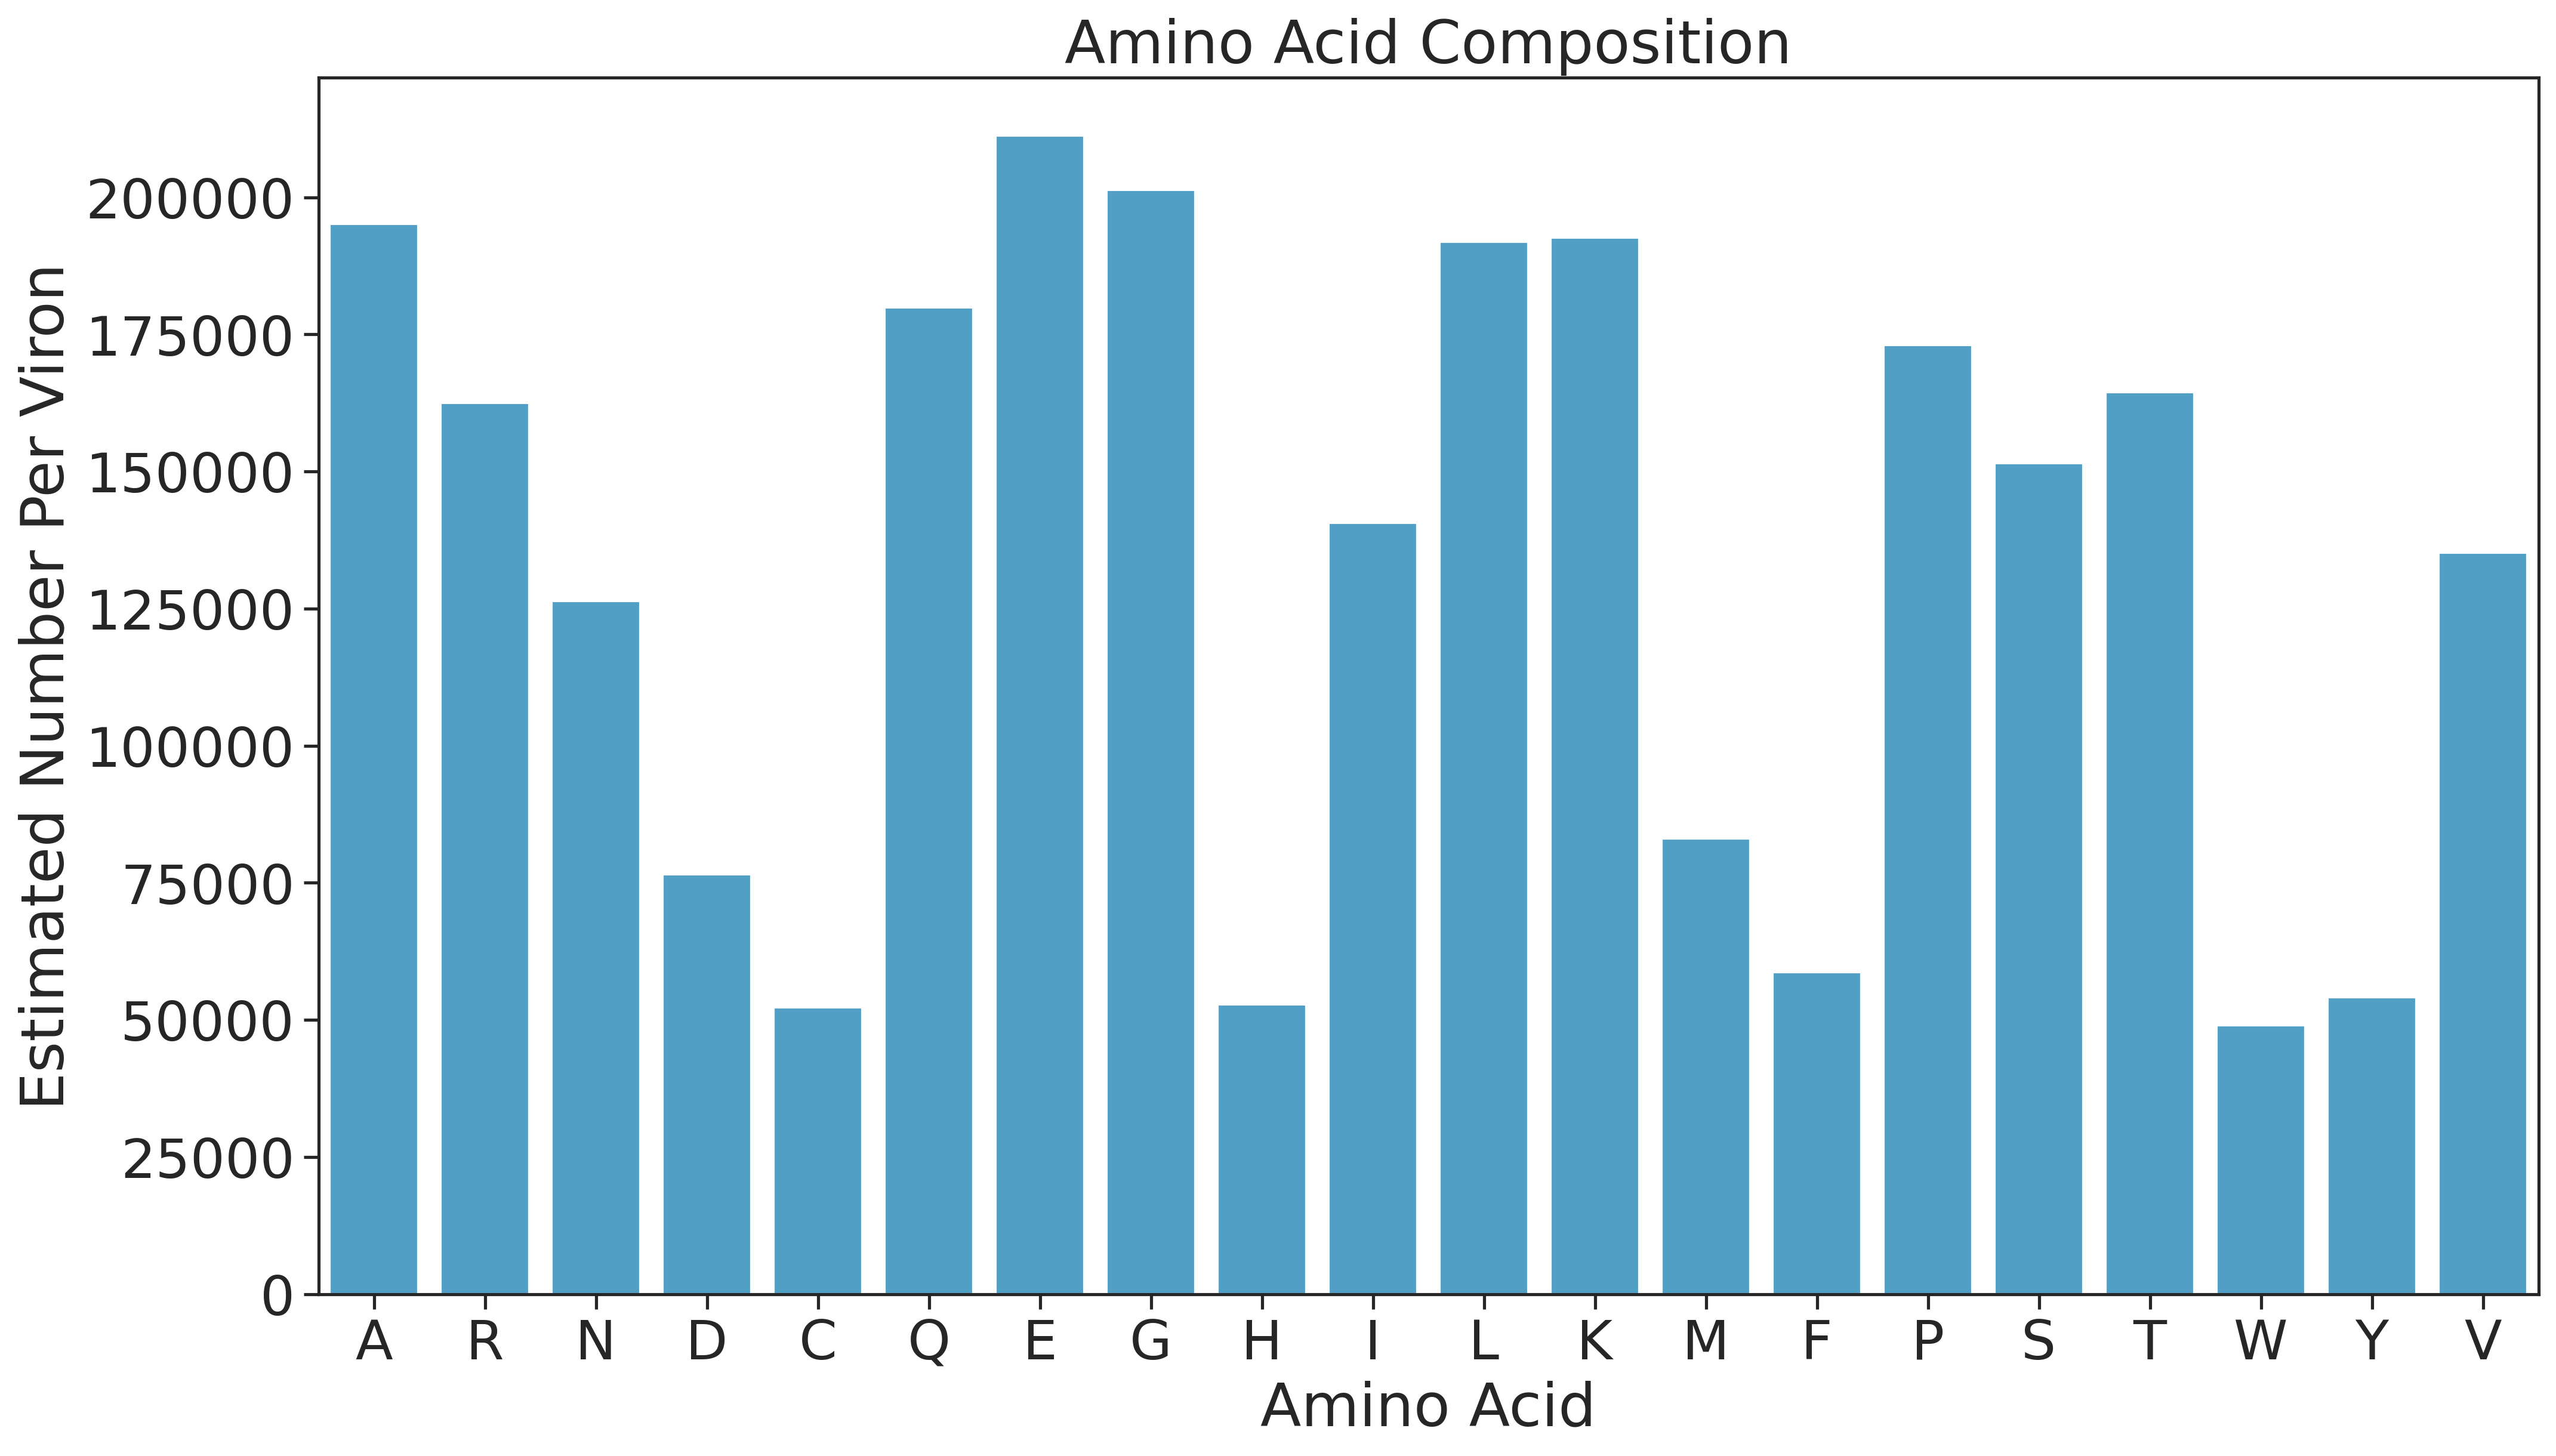

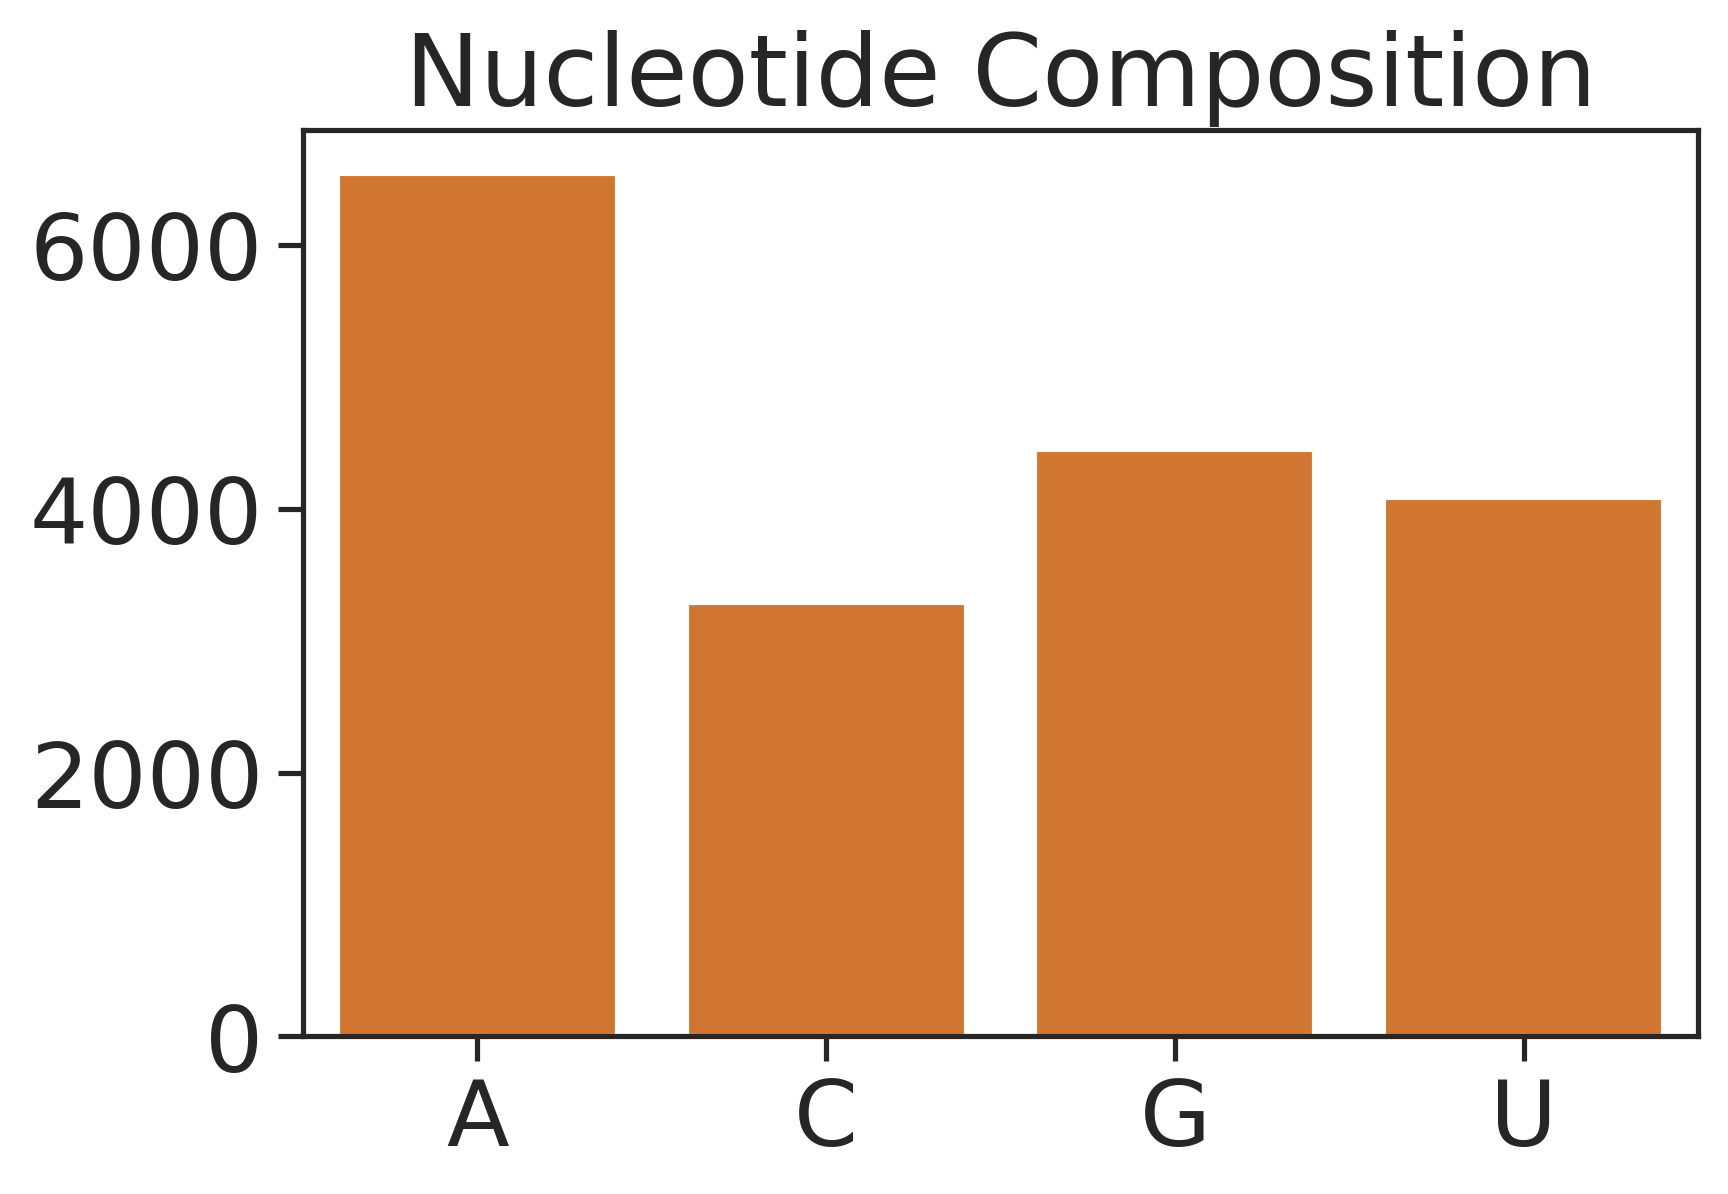

In [19]:
hiv_reaction = generation.CreateCobraReaction(virusFile=virusFile_HIV, Cg=2, genome_strand=1,
                                              totAA=totAA, 
                                              protein_copy_number_dict=protein_copy_number_dict, 
                                              protein_sequence_dict=protein_sequence_dict,
                                              reaction_name='HIV-1_production')

In [24]:
help(generation.CreateCobraReaction)

Help on function CreateCobraReaction in module VBOFKit.generation:

CreateCobraReaction(virusFile, Cg, genome_strand, totAA, protein_copy_number_dict, protein_sequence_dict, reaction_name)
    # Actually create cobra reaction object



# Add virus-production reaction to host GEM model

Naive CD4 T

In [20]:
# HVM building
hostModel  = cobra.io.read_sbml_model('models/host/TNM1055.fbc2.naive.xml')
# VBOF integration
hostModel.add_reactions([hiv_reaction])
hostModel.reactions[-1].reversibility = False
# Assign the solver as glpk
hostModel.solver = 'gurobi'
cobra.io.write_sbml_model(hostModel, filename='models/host-virus-model/NaiveT.hvm.xml')

/home/dell/miniconda3/lib/python3.8/site-packages/cobra/core/reaction.py:810: UserWarning: Setting reaction reversibility is ignored
  warn("Setting reaction reversibility is ignored")


T Helper 1

In [21]:
# HVM building
hostModel  = cobra.io.read_sbml_model('models/host/T1M1133.fbc2.Th1.xml')
# VBOF integration
hostModel.add_reactions([hiv_reaction])
hostModel.reactions[-1].reversibility = False
# Assign the solver as glpk
hostModel.solver = 'gurobi'
cobra.io.write_sbml_model(hostModel, filename='models/host-virus-model/Th1.hvm.xml')

T Helper 2

In [22]:
# HVM building
hostModel  = cobra.io.read_sbml_model('models/host/T2M1127.fbc2.xml')
# VBOF integration
hostModel.add_reactions([hiv_reaction])
hostModel.reactions[-1].reversibility = False
# Assign the solver as glpk
hostModel.solver = 'gurobi'
cobra.io.write_sbml_model(hostModel, filename='models/host-virus-model/Th2.hvm.xml')

T Helper 17

In [23]:
# HVM building
hostModel  = cobra.io.read_sbml_model('models/host/T17M1250.fbc2.xml')
# VBOF integration
hostModel.add_reactions([hiv_reaction])
hostModel.reactions[-1].reversibility = False
# Assign the solver as glpk
hostModel.solver = 'glpk'
cobra.io.write_sbml_model(hostModel, filename='models/host-virus-model/Th17.hvm.xml')